# MyRadex

Link to this notebook: https://www.dropbox.com/s/79pt2r35sqha51h/Myradex-Python-Wrapper-20140804.ipynb

or better this one
http://nbviewer.ipython.org/urls/dl.dropbox.com/s/79pt2r35sqha51h/Myradex-Python-Wrapper-20140804.ipynb

In [1]:
%pylab inline

def lower_keys(p):
    return {k.lower(): p[k] for k in p}

def print_e(en, f):
    for i in xrange(len(en)):
        print('{:9.2f} {:9.2e}'.format(en[i], f[i]))
    return

def cast_into_dic(col_names, arr):
    '''col_names is column_info, and arr is data_transitions (see below).'''
    names = col_names.split()
    return {names[i]: arr[i,:] for i in xrange(len(names))}

Populating the interactive namespace from numpy and matplotlib


# Start using the wrapper

## Import the wrapper

In [2]:
import wrapper_my_radex
wrapper = wrapper_my_radex.myradex_wrapper
about_info = wrapper.about.tostring()
column_info = wrapper.column_names.tostring()
print(about_info)

b'Author: Fujun Du (fjdu@pmo.ac.cn, fujun.du@gmail.com)           '


## Load the molecule data

**The returned ```n_levels,n_item,n_transitions``` are needed for the next step.**

In [3]:
n_levels, n_item, n_transitions = \
    wrapper.config_basic('/Users/fjdu/Dropbox/myCodes/my_radex/',
                         'Fe+_1e5K.dat', 5.73, True)

## Do the statistical equilibrium calculation

### Using the default geometry type

In [4]:
params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

"""The keywords to the wrapper function have to be in
lower case, so I have to lower the keys of params.
Of course you can use lower case letters from the beginning."""

params = lower_keys(params)

"""Do the calculation.
Return a four element tuple, whose meanings are self-evident."""

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

### Specify the geometry type

In [5]:
params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e3,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e4,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e1,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions,
          'geotype': 'lvg'
         }

params = lower_keys(params)

"""
The geotype parameter can take the following values:
spherical
lvg
slab
default
"""

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params_geometry(**params)

# Play with the results

1. You may want to transpose ```data_transitions``` to match the expected layout, but you don't have to.
1. You may also cast the the results into a python dict using ```cast_into_dic``` defined above.

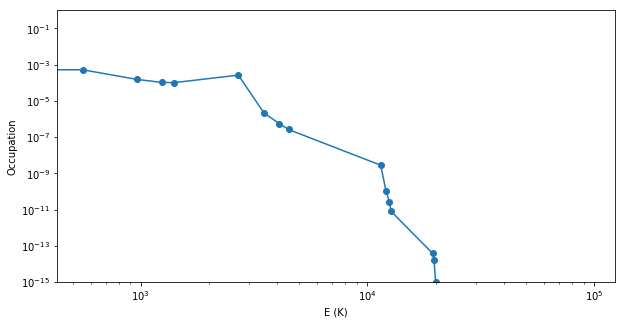

In [6]:
figure(figsize=(10,5))
plot(energies, f_occupations, marker='o')
ax = gca()
ax.set_xlabel('E (K)')
ax.set_ylabel('Occupation')
ax.set_ylim((1e-15,1e0))
ax.set_xscale('log')
ax.set_yscale('log')
#set_axis_format(ax, graygrid=True)

In [11]:
cooling_rate

6.728609586798907e-11

In [21]:
data_transitions.shape

(19, 822)

In [22]:
wrapper.flag_good

array(1, dtype=int32)

In [7]:
wrapper.n_item_column

array(19, dtype=int32)

# Work with other molecules

In [ ]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('/Users/fdu/not_synced/work/from_others/CHIANTI/toLAMDA/',
                         'O.dat', 5.73, True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

params = lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

In [11]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('/Users/fdu/not_synced/work/from_others/CHIANTI/toLAMDA/',
                         'N+_1e5K.dat', True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

     0.00  1.26e-01
    70.07  3.52e-01
   188.19  5.22e-01
 22036.57  1.65e-10
 47031.84  7.89e-23
 67312.53  1.41e-33


In [55]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('/Users/fdu/not_synced/work/from_others/CHIANTI/toLAMDA/',
                         'N+_1e5K.dat', True)

params = {'Tkin': 1e3,
          'dv_CGS': 1e5,
          'dens_X_CGS': 1e6,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e9,
          'HI_density_CGS': 1e1,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 1e6,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)

print_e(energies, f_occupations)

     0.00  1.26e-01
    70.07  3.52e-01
   188.19  5.22e-01
 22036.57  1.65e-10
 47031.84  7.89e-23
 67312.53  1.41e-33


In [56]:
n_levels,n_item,n_transitions = \
    wrapper.config_basic('/Users/fdu/now/transitions/',
                         '12C16O_H2.dat', True)

In [66]:
params = {'Tkin': 1e2,
          'dv_CGS': 10e5,
          'dens_X_CGS': 1e0,
          'Ncol_X_CGS': 1e15,
          'H2_density_CGS': 1e2,
          'HI_density_CGS': 0.0,
          'oH2_density_CGS': 0.0,
          'pH2_densty_CGS': 0.0,
          'HII_density_CGS': 0.0,
          'Electron_density_CGS': 0.0,
          'n_levels': n_levels,
          'n_item': n_item,
          'n_transitions': n_transitions}

lower_keys(params)

energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d1 = cast_into_dic(column_info, data_transitions)
print d1.keys()

params['H2_density_CGS'.lower()] = 1e4
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d2 = cast_into_dic(column_info, data_transitions)

params['H2_density_CGS'.lower()] = 1e5
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d3 = cast_into_dic(column_info, data_transitions)

params['H2_density_CGS'.lower()] = 1e6
energies,f_occupations,data_transitions,cooling_rate = \
    wrapper.run_one_params(**params)
d4 = cast_into_dic(column_info, data_transitions)

['lam', 'Jnu', 'fup', 'tau', 'Blu', 'flow', 'Tr', 'ilow', 'flux_K', 'Tex', 'flux', 'beta', 'gup', 'Aul', 'Bul', 'iup', 'freq', 'Eup', 'glow']


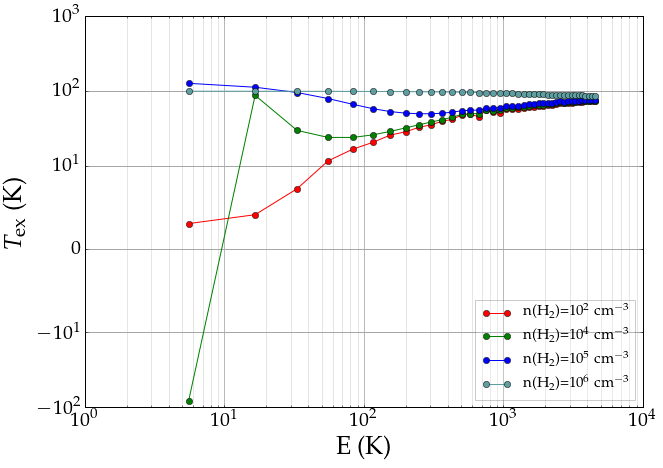

In [71]:
figure(figsize=(10,7))
plot(d1['Eup'], d1['Tex'], marker='o', label='n(H$_2$)=$10^2$ cm$^{-3}$')
plot(d2['Eup'], d2['Tex'], marker='o', label='n(H$_2$)=$10^4$ cm$^{-3}$')
plot(d3['Eup'], d3['Tex'], marker='o', label='n(H$_2$)=$10^5$ cm$^{-3}$')
plot(d3['Eup'], d4['Tex'], marker='o', label='n(H$_2$)=$10^6$ cm$^{-3}$')
ax = gca()
ax.set_xlabel('E (K)')
ax.set_ylabel(r'$T_{\rm ex}$ (K)')
ax.set_xscale('log')
ax.set_yscale('symlog', linthreshy=10)
set_axis_format(ax, graygrid=True)
_ = legend(fontsize=15, framealpha=0.2, loc='best')